In [4]:
from pyhive import hive

ModuleNotFoundError: No module named 'thrift'

In [2]:
from pyhive import hive
import pandas as pd 
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)  # 解决图片输出过多警告
import scorecardpy
from sklearn import linear_model
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,ShuffleSplit,StratifiedKFold,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,r2_score,mean_squared_error,accuracy_score,precision_score,log_loss,roc_auc_score,recall_score,f1_score
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# from sklearn.externals import joblib
import joblib
import xgboost as xgb
from xgboost import plot_importance
from pygam import LinearGAM,LogisticGAM
import itertools
from ipykernel import kernelapp as app


from pandas import DataFrame,Series
from factor_analyzer import FactorAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import bartlett
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import math as math
from numpy import *
import numpy.linalg as nlg
from factor_analyzer import factor_analyzer,Rotator
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity  

ModuleNotFoundError: No module named 'thrift'

In [2]:
#安装包
!pip install --trusted-host didiyum.sys.xiaojukeji.com -i http://didiyum.sys.xiaojukeji.com/didiyum/pip/simple/  graphviz

Looking in indexes: http://didiyum.sys.xiaojukeji.com/didiyum/pip/simple/

ERROR: Could not find a version that satisfies the requirement graphviz (from versions: none)
ERROR: No matching distribution found for graphviz


# 1.函数

In [ ]:
## 1.1 drop_duplicates() 
去掉重复值

df = pd.DataFrame(data={'height':[178,178,185,196],'weight':[156,90,140,142],'name':['小狗','小狗','小狗','小猪']})
df1=df.drop_duplicates().loc[0]['name']
df2=df.drop_duplicates(subset='name')# 删除name列中的重复值
df3=df.drop_duplicates(subset=['name','height'])# 当height和name列的值都重复时，删掉重复值
df4=df.drop_duplicates(subset=['name','height'],keep = 'last')#保留最后一次出现的重复值
#ignore_index: bool,default False布尔值，默认为False;如果为True，会对结果重新排序
df7=df.drop_duplicates(subset=['name','height'],keep = 'last',ignore_index=True)
df7

## 1.2 sort_values()
DataFrame.sort_values(by, ascending=True, inplace=False)

ivs=iv.sort_values(['iv'],ascending=False)#排序
#by：字符串或者List<字符串>，单列排序或者多列排序
#ascending：bool或者List，升序还是降序，如果是list对应by的多列
#inplace：是否修改原始DataFrame
df21=df.sort_values(['weight'],ascending=False)#由高到低
df22=df.sort_values(['height'],inplace=False)#不改变原数据

## 其他

vif = pd.merge(vif,iv,how='left',on='features')#左连接
df=pd.concat([y,df[p0],df[p1]],axis=1)#合并
itertools.product(col,col)#product(A, B)函数，返回A、B中的元素的笛卡尔积的元组
df=df.drop(['msg_gap'],axis=1)#删除

# 添加交叉项   
col=list(dff.columns[1:])
for i,j in itertools.product(col,col):
#    if j==i:   # 取全部的交叉项➡️j>=i，取平方项j==i
        dff[i+j]=dff[i]*dff[j]
#    else:
#        continue
dff.shape

# 2.数据清洗

## 2.1插补

In [53]:
#常数插补0
df['days_since_first_visit'] =  df['days_since_first_visit'].fillna(0)
df=df.fillna(0)#全列插补

#循环插补
df1=df.iloc[:,8:]
for i in df1.columns.values.tolist():
    df1[i] =  df1[i].fillna(0)
df1.isnull().sum()
df1.isna().mean()
df1.to_csv('41_1221.csv')
df1.head()

#众数插补
for i in df1.columns.values.tolist():
    df1[i] =  df1[i].fillna(df1[i].mode()[0])
df1.isnull().sum()

df1.to_csv('78visit0.csv',index=0,header=1)

#空值填充
df['msg_gap'] =  df['msg_gap'].fillna('a')
#插入
df.insert(2,'missing_gap',0)#不要也可
#条件/增加一列
df['missing_gap']=np.where(df['msg_gap']=='a',1,0)
#替换
df.loc[df["msg_gap"] == 'a',"msg_gap"] = 0
df = df.fillna(0)
df.head()

## 2.2数据增加和删除

In [ ]:
#增加一列
#增加一列,购买量,购买量超过3的为高，低于3的为底
df['购买量'] = np.where(df['buy_mount'] >3,'高','低')
df.head(3)

#删除列
del df['auction_id']
df.head(3)

df.insert(0, 'auction_id', auction_id)
df.head(5)

# axis=0按行操作, axis=1按列操作
df.drop(labels = ['property', '购买量'],axis = 1,inplace=True) #删除这两列,加inplace代表是否在原数据上操作, 1代表沿着列的方向
df.drop(labels = [3,4],inplace = True,axis= 0) # 删除索引标签3和4对应的行
df.drop(labels= range(1,10),axis=0,inplace=True)  #删除索引名称1到10,注意range迭代器产生的是1到10


## 2.3数据修改和查找

In [71]:
# 将gender为0的改为女性，1改为男性，2改为未知
df1.loc[df['gender'] =='0','gender'] ='女性'
df1.loc[df['gender'] =='1','gender'] ='男性'
df1.loc[df['gender'] =='2','gender'] ='未知'
df1.head(3)

#修改列名称
#basic.rename(columns={},index={})

# 修改列标签和行索引名称
df1.rename(columns = {'user_id':'用户ID','birthday':'出生日期','gender':'性别'},inplace = True)
df1.rename(index = {1:'one',10:'ten' },inplace = True) #修改行索引名称
df1.reset_index(drop=True,inplace=True)# 重置索引
df1.head(10)

## 2.4条件筛选

### 查询

In [3]:
# 条件查询
df[(df.buy_mount > 3)]#性别等于未知
df[~(df.buy_mount > 3)] # ~代表非
df[ (df.buy_mount > 3) &  (df.day > 20140101)] # 多条件查询
#使用between,inclusive=True代表包含
df[ df['buy_mount'].between(4,10,inclusive=True)]

df.loc[df.user_id =='786295544',['user_id','buy_mount','day']]
df.loc[(df.user_id =='786295544') | (df.user_id =='444069173'),['user_id','buy_mount','day']]# 多个条件选择

test_df12610=pd.read_csv('test_df126.csv')
df4 = test_df12610.loc[(test_df12610.y_prob >=0.04)|(test_df12610.y_prob <=0.1),['credit_apply_flag']]#[['credit_apply_flag','y_prob']]
a1=df4[df4['credit_apply_flag'] ==1].count()
a2=df4[df4['credit_apply_flag'] ==0].count()
a3=df4.count()
print(a1/a3)

In [97]:
df.loc[(28,[82830661,532110457]),['auction_id','cat_id']]# 第二层索引选择，选择2个变量
df.loc[([28,50014815])] #第一层索引为28和50014815

auction_id    cat_id
cat1 user_id                         
28   532110457  17916191097  50011993
     82830661   19948600790  50013874

### 关联

In [92]:
#关联字段必须类型一致
df = pd.read_csv('baby_trade_history.csv', encoding='utf-8',dtype={'user_id':str})# 交易数据
df1 = pd.read_csv('sam_tianchi_mum_baby.csv',encoding = 'utf-8',dtype =str)#婴儿信息
df2 = pd.merge(left = df, right=df1,  how='inner',  left_on='user_id', right_on = 'user_id')# 内连接
df2.head(10)

,user_id,auction_id,cat_id,cat1,property,buy_mount,day,birthday,gender
0,513441334,19909384116,50010557,50008168,25935:21991;1628665:29784;22019:34731;22019:20...,1,20121212,20110105,1
1,377550424,15771663914,50015841,28,1628665:3233941;1628665:3233942;3914866:11580;...,1,20121123,20110620,1
2,47342027,14066344263,50013636,50008168,21458:21599;13585028:3416646;1628665:3233942;1...,1,20120911,20101008,1
3,119784861,20796936076,50140021,50008168,21458:120325094;22019:2026;22019:34731;22019:3...,1,20121129,20120327,0
4,159129426,15198386301,50013711,50008168,21458:11580;1628665:29778;22019:3340598;22019:...,2,20120808,20100825,0
5,645596397,20115324762,50010549,50008168,21458:11580;25935:31381;1628665:3233942;162866...,1,20121130,20130220,0
6,757254614,35900705534,50013711,50008168,1628665:29798;1628665:29785;22019:3284610;2201...,1,20131220,20090528,0
7,275261625,23062392785,50010558,50008168,25935:21991;1628665:3233941;22019:3284610;2201...,1,20130610,20100525,0
8,35832151,19178578964,50012451,50008168,1628665:3233942;1628665:3233939;1628665:92012;...,1,20140228,20090401,1
9,1834895775,43246645145,50010544,50008168,21458:159383086;13023209:125784;25935:31381;16...,1,20150102,20090515,0


In [57]:
# X/Y重组
y = df['credit_apply_flag']
fea = pd.concat([df['previous_msg'],df.iloc[:,2:]],axis=1)
df = pd.concat([y,fea],axis=1)
df.head()

,credit_apply_flag,previous_msg,missing_interval,missing_wl,missing_gap,msg_gap,enter_wl_days,finish_orders,night_finish_orders,week_finish_orders,...,otherpayment_gmv,creditcard_num,otherpayment_num,avg_mile,last_call_interval,last_gmv,other_order_amt,avg_gmv,regist_day,city_type
0,1,0,0,0,1,0.0,0.0,3.0,0.0,1.0,...,115.24,1,1,20.440000,3.0,263.80,0.00,167.380000,616.0,1
1,1,0,0,0,1,0.0,0.0,12.0,0.0,6.0,...,1032.79,2,11,6.723846,6.0,124.61,773.92,67.016670,614.0,1
2,1,0,0,0,1,0.0,2.0,2.0,0.0,1.0,...,0.00,2,0,18.375000,4.0,165.80,92.10,128.950000,618.0,1
3,1,0,0,0,1,0.0,2.0,6.0,0.0,3.0,...,88.35,3,3,1.566667,1.0,24.75,128.81,30.751667,615.0,0
4,1,0,0,0,1,0.0,2.0,1.0,0.0,1.0,...,229.82,0,2,12.035000,27.0,94.58,229.82,94.580000,615.0,1


## 2.5异常值处理

### 删除缺失较多

In [14]:
# 删除所有样本中缺失值超过30%的行
def del_rows(data):
    t = int(0.7*data.shape[1])
    data = data.dropna(thresh=t)#保留至少有 t 个非空的行
    #data = data[(data.T != 0).any()]
    return data

###删除所有行中缺失值超过30%的列
def remcolumns(data):
    t = int(0.7*data.shape[0])
    data = data.dropna(thresh=t,axis=1)#保留至少有 t 个非空的列
    #data = data.loc[:, (data != 0).any(axis=0)]
    return data

# 删缺失列
miss = df.isnull().sum()/df.shape[0]
droplist = list(miss[miss>=0.9].index)
droplist
# list(miss[miss==0].index)
missco = list(miss[(miss>0)&(miss<0.9)].index)
missco

# 删除存在空值的变量中全是空值的行
df = df.dropna(axis=0,how='all',subset=missco)  # thresh=len(df.columns)
df.shape

# 删唯一值
nui = df.nunique()
droplist = list(nui[nui==1].index)
droplist
# droplist.remove('bind_card')
df=df.drop(droplist,axis=1)
df.shape

# 删同一值占比
pct = pd.DataFrame()
pct['feature'] = [i for i in list(df.columns[1:])]
pct['pct'] = [(df[i].value_counts()/df.shape[0]).values.max() for i in list(df.columns[1:])]
pct[pct.pct>=0.9]

### 分位数替换

In [14]:
#异常值处理-99分位数替换
for i in list(df2.columns[1:]):
    df2[i]=np.where(df[i]>=np.percentile(df[i],95),np.percentile(df[i],95),df[i])
df2.head()

df2.skew(axis=0)

# 特征直方图
df2.hist(bins=30,figsize=(15,15))
plt.figure()

# 右偏
a=[i for i in list(sk[sk>1].index) if i != 'credit_apply_flag']
for i in a:
    dff[i]=np.where(dff[i]>=np.percentile(dff[i],97),np.percentile(dff[i],97),dff[i])
dff.head()

# 左偏
b=[i for i in list(sk[sk<-1].index)]
for i in b:
    dff[i]=np.where(dff[i]<=np.percentile(dff[i],3),np.percentile(dff[i],3),dff[i])
dff.head()

# 特征直方图
dff.hist(bins=30,figsize=(10,10))
plt.figure()

#偏度
dff.skew(axis=0)

## 2.6相关系数热力图

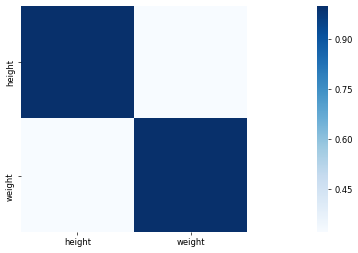

In [29]:
df_corr = df.corr()
plt.figure(figsize=(30,5),dpi=60,facecolor='w')
sns.heatmap(df_corr, annot=False, vmax=1, square=True, cmap="Blues")
plt.show()

# 3 特征筛选/降维

## 3.1 分箱

In [ ]:
#分箱
bins = scorecardpy.woebin(df, y='credit_apply_flag', count_distr_limit=0.06, bin_num_limit=8)
scorecardpy.woebin_plot(bins)#作图

### iv

# 获取分箱iv
iv = pd.DataFrame() 
iv['features'] = [bins[i][['variable','total_iv']].drop_duplicates().loc[0]['variable'] for i in bins]
iv['iv'] = [bins[i][['variable','total_iv']].drop_duplicates().loc[0]['total_iv'] for i in bins]
ivs=iv.sort_values(['iv'],ascending=False)
ivs.head()

# 删掉iv值低/高的
#IV值特征对预测函数的贡献
#<0.03特征几乎不含有效信息，对模型没有贡献，这种特征可以被删除
#0.03~0.09有效信息很少，对模型的贡献度低
#0.1~0.29有效信息量一般，对模型的贡献度中等
#0.3~0.49有效信息非常多，对模型的贡献度较高
#=0.5有效信息非常多，对模型的贡献超高并且可疑
droplist=list(iv[(iv.iv<0.02)|(iv.iv>0.6)]['features'])
df=df.drop(droplist,axis=1)
df.shape

### vif 

#方差膨胀因子，检验多重共线性
#两个自变量对应的方差膨胀因子均低于10，说明构 建模型的数据并不存在多重共线性。
#如果发现变量之间存在多重共线性 的话，可以考虑删除变量或者重新选择模型
X_vif = df.iloc[:,1:]
vif = pd.DataFrame() 
vif["features"] = X_vif.columns
vif["vif"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])] 
vif = pd.merge(vif,iv,how='left',on='features')
vif.sort_values(['vif'],ascending=False)

## 3.2 XGB

In [21]:
Y = df['credit_apply_flag']
X = df.iloc[:,1:]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape

xgbm = xgb.XGBClassifier()
xgbm.fit(X_train, y_train)

# predicted proability
train_pred = xgbm.predict_proba(X_train)[:,1]
test_pred = xgbm.predict_proba(X_test)[:,1]
# 预测结果
y_train_pred = xgbm.predict(X_train) 
y_test_pred = xgbm.predict(X_test)

# MSE 均方误差
print('准确率:',xgbm.score(X_test, y_test)) # 全体
print('ACC: %.4f' % metrics.accuracy_score(y_test,y_test_pred)) 
print('MSE:', metrics.mean_squared_error(y_test,y_test_pred))
print('AUC: %.4f' % metrics.roc_auc_score(y_test,test_pred))
print('Recall: %.4f' % metrics.recall_score(y_test,y_test_pred))  
print('Precesion: %.4f' % metrics.precision_score(y_test,y_test_pred))  # y
print('F1-score: %.4f' % metrics.f1_score(y_test,y_test_pred)) 

fpr,tpr,threshold=metrics.roc_curve(y_test,test_pred)
rocauc=metrics.auc(fpr,tpr)   #AUC，AUC>0.7，表示可接受的区辨能力
print("AUC:",rocauc)
print("KS:",max(tpr-fpr))  # KS值，KS>0.3，表示可接受的区辨能力

confusion_matrix(y_test,y_test_pred)

# 每个系数的影响力，系数越大表示特征在分类中起到的作用越大
importance = pd.DataFrame({'features':X_train.columns,'importance':xgbm.feature_importances_}) 
importance.sort_values(['importance'],ascending=False)

plot_importance(xgbm,max_num_features=20,importance_type='gain')  # 默认是importance_type='weight'
plt.show()

# gain是使用该特征切分的平均增益，weight是特征在树中出现的次数

#fit model using each importance as a threshold
thresholds = np.sort(xgbm.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgbm,threshold=thresh,prefit=True )
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = xgb.XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred=(selection_model.predict_proba(select_X_test)[:,1]>0.5)*1
    # y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = metrics.accuracy_score(y_test,predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy * 100.0))

# 确定最终入模特征
p=[i for i in list(importance.sort_values(['importance'],ascending=False).head(15)['features'])]
df=pd.concat([y,df[p]],axis=1)
df.shape

# 入模特征
df.columns

## 3.3因子分析降维

### 3.3.1数据标准化和适用性检验

In [13]:
#调用sklearn库进行数据标准化
std = StandardScaler()
df_fas1 = std.fit_transform(df_fa1)
df_fas1 = pd.DataFrame(df_fas1, columns=df_fa1.columns)
df_fas1.head()

# kmo值要大于0.7
kmo = calculate_kmo(df_fas1)  
# bartlett球形度检验p值要小于0.05
bartlett = calculate_bartlett_sphericity(df_fas1)  

print("\n因子分析适用性检验:")
print('kmo:{}    bartlett:{}'.format(kmo[1], bartlett[1]))

### 3.3.2 计算累计贡献率并确定因子个数

In [13]:
import numpy.linalg as nlg #导入nlg函数，linalg=linear+algebra
C=df_fa1.corr() #相关系数矩阵
df_fa_cov1 = np.cov(df_fas1.T)
eig_value1,eig_vector1=nlg.eig(df_fa_cov1) #计算特征值和特征向量
eig1=pd.DataFrame() #利用变量名和特征值建立一个数据框
eig1['names']=df_fa1.columns#列名
eig1['eig_value1']=eig_value1#特征值
eig1.head()

#计算各特征值的方差贡献率
w1 = list()
for i in range(len(eig_value1)):
    w1.append(eig1['eig_value1'][i] / eig1['eig_value1'].sum())
#print(w)
w1= pd.DataFrame(w1,columns =['贡献率'])
w1.head()

#计算特征值的累计贡献率
q1 = list()
for j in range(len(eig_value1)):
    q1.append(eig1['eig_value1'][:j].sum() / eig1['eig_value1'].sum())
#print(q)
q1= pd.DataFrame(q1,columns =['累计贡献率'])
q1.head()
z1=pd.concat([w1,q1],axis=1)
z1.to_csv('过往白_累计贡献率.csv',index=1,header=1,encoding='utf-8-sig')
z1.head(6)

from math import sqrt

for k in range(1,20): #确定公共因子个数
    if eig1['eig_value1'][:k].sum()/eig1['eig_value1'].sum()>=0.8: #如果解释度达到80%, 结束循环
        print(k)
        print(eig1['eig_value1'][:k].sum()/eig1['eig_value1'].sum())
        break

### 3.3.3 计算旋转后的因子载荷矩阵

In [13]:
A1=[]
for i in range(5):
    col=list(sqrt(eig_value1[i])*eig_vector1[:,i])
    A1.append(col)
A1=pd.DataFrame(A1).T #构造因子载荷矩阵A
A1

col=[]
for i in range(1,6):
    col.append('factor%d'%(i))
A1.columns=[col] #因子载荷矩阵A的公共因子
A1.head()

h1=np.zeros(10) #变量共同度，反映变量对共同因子的依赖程度，越接近1，说明公共因子解释程度越高，因子分析效果越好
D1=np.mat(np.eye(10))#特殊因子方差，因子的方差贡献度 ，反映公共因子对变量的贡献，衡量公共因子的相对重要性
A1=np.mat(A1) #将因子载荷阵A矩阵化
A1

for i in range(10):
    a=A1[i,:]*A1[i,:].T #A的元的行平方和
    h1[i]=a[0,0]  #计算变量X共同度,描述全部公共因子F对变量X_i的总方差所做的贡献，及变量X_i方差中能够被全体因子解释的部分
    D1[i,i]=1-a[0,0] #因为自变量矩阵已经标准化后的方差为1，即Var(X_i)=第i个共同度h_i + 第i个特殊因子方差

from numpy import eye, asarray, dot, sum, diag #导入eye,asarray,dot,sum,diag 函数
from numpy.linalg import svd #导入奇异值分解函数

def varimax(Phi, gamma = 1.0, q =10, tol = 1e-6): #定义方差最大旋转函数
    p,k = Phi.shape #给出矩阵Phi的总行数，总列数
    R = eye(k) #给定一个k*k的单位矩阵
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)#矩阵乘法
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda)))))) #奇异值分解svd
        R = dot(u,vh)#构造正交矩阵R
        d = sum(s)#奇异值求和
    if d_old!=0 and d/d_old:
        return dot(Phi, R)#返回旋转矩阵Phi*R

rotation_mat1=varimax(A1)#调用方差最大旋转函数
rotation_mat1=pd.DataFrame(rotation_mat1)#数据框化
rotation_mat1.columns=[col] 
rotation_mat1.insert(0,'变量名称',df_fas1.columns)
rotation_mat1.to_csv('过往白_fas因子矩阵.csv',index=0,header=1,encoding="utf_8_sig")
rotation_mat1

### 3.3.4计算因子得分

In [13]:
rotation_mat1=rotation_mat1.iloc[:,1:]
data1=np.mat(df_fas1) #矩阵化处理
factor_score=(data1).dot(rotation_mat1) #计算因子得分
factor_score=pd.DataFrame(factor_score)#数据框化
factor_score.columns=[col] #对因子变量进行命名
factor_score
#factor_score.to_excel(outputfile)#打印输出因子得分矩阵
factor_score.to_csv('过往白_fas因子得分.csv',index=0,header=1,encoding="utf_8_sig")
factor_score.head()

#检验因子相关性
dff_corr=factor_score.corr()
plt.figure(figsize=(30,8),dpi=60,facecolor='w')
sns.heatmap(dff_corr, annot=False, vmax=1, square=True, cmap="Blues")
plt.show()

## 3.4 RandmForest

In [66]:
x, y = df.iloc[:, 1:].values, df.iloc[:, 0].values #0表示从第一列开始，即索引下标为0的列
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=1)
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] #[::-1]表示将各指标按权重大小进行排序输出

indices[:33]
for f in range(33):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    

# 每个系数的影响力，系数越大表示特征在分类中起到的作用越大
importance = pd.DataFrame({'features':x_train.columns,'importance':forest.feature_importances_}) 
importance.sort_values(['importance'],ascending=False)

# 保存模型
joblib.dump(forest,'forest_test.m')  # 存储为文件

# 调用模型
df_test = df.iloc[:,1:].sample(n=3000,random_state=0).fillna(0)
df_test.head()

forest1 = joblib.load('forest_test.m')

Y_pred = forest1.predict(df_test) 
Y_pred_pro = forest1.predict_proba(df_test)[:,1]
print(Y_pred)
print(Y_pred_pro)

#画图
import seaborn as sns
import matplotlib.pyplot as plt
features = df.iloc[:, 1:].columns
feature_importances = forest.feature_importances_
features_df = pd.DataFrame({'Features':features,'Importance':feature_importances})
features_df.sort_values('Importance',inplace=True,ascending=False)

sns.set(rc={"figure.figsize": (20, 8)})
sns.barplot(features_df['Features'][:12], features_df['Importance'][:12],palette="Blues_d")
plt.title("Importance of Features",fontsize = 18)
plt.ylabel('import level')
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
# 数据可视化：柱状图
sns.despine(bottom=True)
plt.show()

## 3.5 GAM

In [45]:
x, y = df_21.iloc[:, 1:].values, df_21.iloc[:, 0].values #0表示从第一列开始，即索引下标为0的列
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

gam = LogisticGAM().fit(x_train, y_train)
gam.accuracy(x_test,y_test)

# Partial dependency plots
total_features_fwd, score_dict_fwd = forward_stepwise_selection(df_21,'credit_apply_flag')
features_selected = total_features_fwd[18]

plt.rcParams['figure.figsize'] = (30, 5)
fig, axs = plt.subplots(1,18)
titles = features_selected

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])
    
plt.show()

#单图
for i in range(len(df.columns)-1):
    df_1 = pd.concat([df.iloc[:,0],df.iloc[:,i+1]],axis=1)
    x, y = df_1.iloc[:, 1].values, df_1.iloc[:, 0].values #0表示从第一列开始，即索引下标为0的列
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    gam = LogisticGAM().fit(x, y)
    total_features_fwd, score_dict_fwd = forward_stepwise_selection(df_1,'credit_apply_flag')
    features_selected = total_features_fwd[1]

# Partial dependency plots
    plt.rcParams['figure.figsize'] = (5, 5)
    fig, axs = plt.subplots(1,1)
    titles = features_selected

#for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=0)
    axs.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX))
    axs.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX, width=.95)[1], c='r', ls='--')
    axs.set_title(titles[0])
    
    plt.show()

## 3.6 逐步向前线性回归算法变量筛选

In [21]:
def forward_stepwise_selection(data,target):
    
    total_features = [[]]
    score_dict = {}
    remaining_features = [col for col in data.columns if not col == target]
    
    for i in range(1,len(data.columns)):
        best_score = 0;best_feature = None
        for feature in remaining_features:

            X = total_features[i-1] + [feature]
            model = LinearRegression().fit(data[X],data[target])
            score = r2_score(data[target],model.predict(data[X]))

            if score > best_score:
                best_score = score
                best_feature = feature
        
        total_features.append(total_features[i-1] + [best_feature])
        remaining_features.remove(best_feature)
        score_dict[i] = best_score
    
    return total_features,score_dict

total_features_fwd, score_dict_fwd = forward_stepwise_selection(df,'credit_apply_flag')

X_train,X_test,y_train,y_test = train_test_split(df.drop('credit_apply_flag',axis = 1),df['credit_apply_flag'],test_size = 0.2)

validation_scores_dict = {}
for features in total_features_fwd[1:]:
    lr = LinearRegression()
    lr.fit(X_train[features],y_train)
    preds = lr.predict(X_test[features])
    validation_scores_dict[len(features)] = mean_squared_error(y_test,preds)
    
print(total_features_fwd)
print(validation_scores_dict)

# 选择特征,根据R2及MSE选取
# By Validation error
plt.figure(figsize = (6,6))
plt.plot(list(validation_scores_dict.keys()),list(validation_scores_dict.values()))
plt.xlabel('Number of features')
plt.ylabel('Validation error')
plt.title('Forward Selection_Validation error')

# By r2 score
temp = pd.DataFrame({'Number of Features':np.arange(1,len(total_features_fwd)),
                     'R_2_score':list(score_dict_fwd.values())})
plt.figure(figsize = (12,6))
g = sns.FacetGrid(data = temp,size=5)
g.map(plt.scatter, 'Number of Features' , 'R_2_score')
g.map(plt.plot, 'Number of Features', 'R_2_score')
plt.xticks = list(np.arange(1,len(total_features_fwd)))
plt.title('Forward Selection_r2 score')

features_selected = total_features_fwd[21]
features_selected

## 3.7逐步向前逻辑回归算法变量筛选

In [23]:
def forward_select(data,response):
    remaining=set(data.columns)
    remaining.remove(response)
    selected=[]
    current_score,best_new_score=float('inf'),float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula='{}~{}'.format(response,'+'.join(selected+[candidate]))
            aic=smf.glm(formula=formula,data=data,family=sm.families.Binomial(sm.families.links.logit)).fit().aic
            aic_with_candidates.append((aic,candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score,best_candidate=aic_with_candidates.pop()
        if current_score>best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score=best_new_score
            print('aic is {},continuing!'.format(current_score))
        else:
            print('forward selection over!')
            break
    # 输出影响较大的自变量列表
    formula='{}~{}'.format(response,'+'.join(selected))
    print('final formula is {}'.format(formula))
    return formula
    # model=smf.glm(
        # formula=formula,data=data,
        # family=sm.families.Binomial(sm.families.links.logit)
    # ).fit()
    # return(model)
    

formula_fwd = forward_select(df,'credit_apply_flag')
formula_fwd

# 4.建模

## 4.1 逻辑回归

In [11]:
Y = df['credit_apply_flag']
X = df.iloc[:,1:]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape

lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1, max_iter=3000)  # 增加迭代次数
lr.fit(X_train, y_train)
print(X_train.columns)
print('系数',lr.coef_)
print('截距',lr.intercept_)

y_prob = lr.predict_proba(X_test)[:,1]
y_pred = lr.predict(X_test)
print("准确率:",lr.score(X_test, y_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
#predict返回的是一个预测的值，predict_proba返回的是对于预测为各个类别的概率

fpr,tpr,threshold=metrics.roc_curve(y_test,y_prob)
rocauc=metrics.auc(fpr,tpr)   # AUC，AUC>0.7，表示可接受的区辨能力
print("AUC:",rocauc)
print("KS:",max(tpr-fpr))  # KS值，KS>0.3，表示可接受的区辨能力

lr2 = sm.Logit(y_train,X_train)
print(lr2.fit().summary())
#输出显著性

In [236]:
# 画出混淆矩阵
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
# print(classification_report(y_test, y_test_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
(tn, fp, fn, tp) 

sns.set_style('white') # 设置全局的图的背景为白色
def show_cm(y_test, y_test_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.xticks([0,1])
    plt.yticks([0,1])
    plt.xlabel("Predict")
    plt.ylabel("True")
    plt.text(x=0-0.1, y=0, s="TN:"+str(tn), color='black') # 设置文本，位置由x,y确定，x,y为相对位置。0-1
    plt.text(x=1-0.1, y=0, s="FP:"+str(fp), color='black')
    plt.text(x=0-0.1, y=1, s="FN:"+str(fn), color='black')
    plt.text(x=1-0.1, y=1, s="TP:"+str(tp), color='black')
    # 样本1的查准和召回：
    查准率 = tp/(tp + fp)
    召回率 = tp/(tp + tn)
    print("查准率:",查准率)
    print("召回率:",召回率)
    plt.show()

show_cm(y_test, y_test_pred)

# performance ks & roc ------
train_perf = scorecardpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scorecardpy.perf_eva(y_test, test_pred, title = "test")

## 4.2 XGBoost

In [22]:
X = df.iloc[:,1:].reset_index(drop=True).values
y = df['credit_apply_flag'].reset_index(drop=True).values
xgbm = xgb.XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=1000,objective='binary:logistic')
kf = StratifiedShuffleSplit(n_splits=10, train_size=0.9, test_size=0.1, random_state=0)
accuracy_score = [] 
roc_auc_score = []
mean_squared_error = []
ks = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgbm.fit(X_train, y_train)
    y_prob=xgbm.predict_proba(X_test)[:,1]
    y_pred=xgbm.predict(X_test)
    accuracy_score.append(metrics.accuracy_score(y_test,y_pred))
    roc_auc_score.append(metrics.roc_auc_score(y_test,y_prob))
    mean_squared_error.append(metrics.mean_squared_error(y_test,y_pred))
    fpr,tpr,threshold=metrics.roc_curve(y_test,y_prob)
    rocauc=metrics.auc(fpr,tpr)
    ks.append(max(tpr-fpr))
    
print('准确率', np.mean(accuracy_score))
print('AUC', np.mean(roc_auc_score))
print('KS', np.mean(ks))
print('MSE', np.mean(mean_squared_error))

准确率 0.9047619047619049
AUC 0.6044067678452473
KS 0.20095868340468162
MSE 0.09523809523809523


## 4.3保存/调用模型

In [267]:
#保存
joblib.dump(xgbm,'xgbm_visit_1.m')
#调用
xgbm111 = joblib.load('xgbm_visit_1.m')
#预测
xgbm111.predict(X_126).sum()

# 5.评价指标

## 5.1 ks曲线

In [ ]:
# performance ks & roc ------
#ks值含义:>0.3模型预测性较好；0,2~0.3模型可用；0~0.2模型预测能力较差；< 0模型错误

test_perf = scorecardpy.perf_eva(y_test, y_prob, title = "test")

fpr,tpr,threshold=metrics.roc_curve(y_test,y_prob)
print("KS:",max(tpr-fpr))  # KS值，KS>0.3，表示可接受的区辨能力

## 5.2 AUC和ROC曲线

In [ ]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_prob)
rocauc=metrics.auc(fpr,tpr)   # AUC，AUC>0.7，表示可接受的区辨能力
print("AUC:",rocauc)

# 6.调参

## 6.1网格搜索法

In [ ]:
# GridSearch+交叉
param_grid = [
{'penalty': ['l1','l2'], 'C': [0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]}
]  
lr = LogisticRegression(solver='saga', n_jobs=-1, max_iter=3000)  # 增加迭代次
kf = StratifiedShuffleSplit(n_splits=10, train_size=0.9, test_size=0.1, random_state=0)#打乱划分
grid_search = GridSearchCV(lr, param_grid, cv=kf, scoring='roc_auc')  # neg_mean_squared_error
grid_search.fit(X, Y)  # 作用于全量样本
print (grid_search.best_params_)
print (grid_search.best_estimator_)

In [ ]:
#rf
#gridsearch+交叉
param_grid = [
{'n_estimators':[1000,4000,7000,10000],'max_depth':[3,4,5],'max_features':[4,7,10],'min_samples_split':[2,5,8,10],'min_samples_leaf':[1,3,5]}
]  
rf = RandomForestClassifier(random_state=0,n_jobs=-1,oob_score=True)
kf = StratifiedShuffleSplit(n_splits=10, train_size=0.9, test_size=0.1, random_state=0)
grid_search = GridSearchCV(rf, param_grid, cv=kf, scoring='roc_auc')  # neg_mean_squared_error
grid_search.fit(X, Y)  # 作用于全量样本
print (grid_search.best_params_)
print (grid_search.best_estimator_)
print('每轮迭代运行结果:')
means = grid_search.cv_results_['mean_test_score']  # 输出5次训练的auc均值,取auc最大的参数组合
params = grid_search.cv_results_['params'] 
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

## 6.2手动调参

In [ ]:
#product(list1, list2) 依次取出list1中的每1个元素，与list2中的每1个元素，组成元组，
#然后将所有的元组组成一个列表
p=['l1','l2']
c=[1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,2,3,4,5,6,7,8,9,10]
for i,j in itertools.product(p,c):
    lr = LogisticRegression(penalty=i, C=j, solver='saga', n_jobs=-1, max_iter=3000)  # 增加迭代次数
    lr.fit(X_train, y_train)
    y_prob = lr.predict_proba(X_test)[:,1]
    y_pred = lr.predict(X_test)
    print('penalty:',i)
    print('C:',j)
    fpr,tpr,threshold=metrics.roc_curve(y_test,y_prob)
    rocauc=metrics.auc(fpr,tpr)   # AUC，AUC>0.7，表示可接受的区辨能力
    print("AUC:",rocauc)

In [26]:
#XGB调参
max_depth=[1,2,3,4]
learning_rate=[0.001,0.005,0.01]
n_estimators=[1000,4000,7000,10000]
X = df.iloc[:,1:].reset_index(drop=True).values
y = df['credit_apply_flag'].reset_index(drop=True).values
kf = StratifiedShuffleSplit(n_splits=10, train_size=0.9, test_size=0.1, random_state=0)

max_depth=3

auc = []
mse = []
for i, j in itertools.product(learning_rate,n_estimators): 
    xgbm = xgb.XGBClassifier(learning_rate=i, n_estimators=j, max_depth=3, objective='binary:logistic')
    roc_auc_score = []
    mean_squared_error = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        xgbm.fit(X_train, y_train)
        y_prob=xgbm.predict_proba(X_test)[:,1]
        y_pred=xgbm.predict(X_test)
        roc_auc_score.append(metrics.roc_auc_score(y_test,y_prob))
        mean_squared_error.append(metrics.mean_squared_error(y_test,y_pred))
    auc.append(np.mean(roc_auc_score))
    mse.append(np.mean(mean_squared_error))
    print('learning_rate', i) 
    print('n_estimators', j)
    print('AUC', np.mean(roc_auc_score))
    print('MSE', np.mean(mean_squared_error))
print(auc)
print(mse)

# 7.验证集验证

In [26]:
# 展示测预测概率对应的正负样本分布情况  
test_result126 = test_df126[['credit_apply_flag','y_prob']]
breaks_adj = {'y_prob': [0.02,0.05,0.09]}
bins_score126 = scorecardpy.woebin(test_result126, y='credit_apply_flag',breaks_list=breaks_adj)
scorecardpy.woebin_plot(bins_score126)

plt.figure(figsize = (5,5))
bins_score126['y_prob'].iloc[:,6].plot(label='badprob')
bins_score126['y_prob'].iloc[:,3].plot(label='count_distr')
plt.legend()

dft126 = bins_score126['y_prob'].iloc[:,:7]
dft126['bad']/dft126['bad'].sum()

test1 = test_df126[['credit_apply_flag','y_prob']]
bk1 = {'y_prob': list(np.linspace(0.01,0.5,50))}  # 每隔0.01画一个cut，np.linspace(),np.arange(),也可以写循环
bins1 = scorecardpy.woebin(test1, y='credit_apply_flag',breaks_list=bk1)
# scorecardpy.woebin_plot(bins1)

dftest1 = bins1['y_prob'].iloc[:,:7]
dftest1['cut']=list(np.linspace(0.01,0.5,49))
dftest1=dftest1.sort_values(['cut'],ascending=False)
dftest1['count_cumsum']=dftest1['count'].cumsum()
dftest1['bad_cumsum']=dftest1['bad'].cumsum()
dftest1['count_cumpct']=dftest1['count_cumsum']/dftest1['count'].sum()
dftest1['bad_cumpct']=dftest1['bad_cumsum']/dftest1['bad'].sum()
dftest1['gap']=dftest1['bad_cumpct']-dftest1['count_cumpct']
dftest1.to_csv('过往白0.01间隔数据.csv')
dftest1

plt.figure(figsize = (6,6))
plt.plot(dftest1['cut'],dftest1['count_cumpct'],label='msg_cumsumpct')
plt.plot(dftest1['cut'],dftest1['bad_cumpct'],label='creditsubmit_cumsumpct')
plt.xlabel('proability score')
plt.ylabel('cumsumpct')
plt.title('Test')
plt.legend()